                        1960       1961       1962       1963       1964  \
Indicator Name                                                             
Population, total  8996967.0  9169406.0  9351442.0  9543200.0  9744772.0   

                        1965        1966        1967        1968        1969  \
Indicator Name                                                                 
Population, total  9956318.0  10174840.0  10399936.0  10637064.0  10893772.0   

                   ...        2011        2012        2013        2014  \
Indicator Name     ...                                                   
Population, total  ...  30117411.0  31161378.0  32269592.0  33370804.0   

                         2015        2016        2017        2018        2019  \
Indicator Name                                                                  
Population, total  34413603.0  35383028.0  36296111.0  37171922.0  38041757.0   

                         2020  
Indicator Name                 

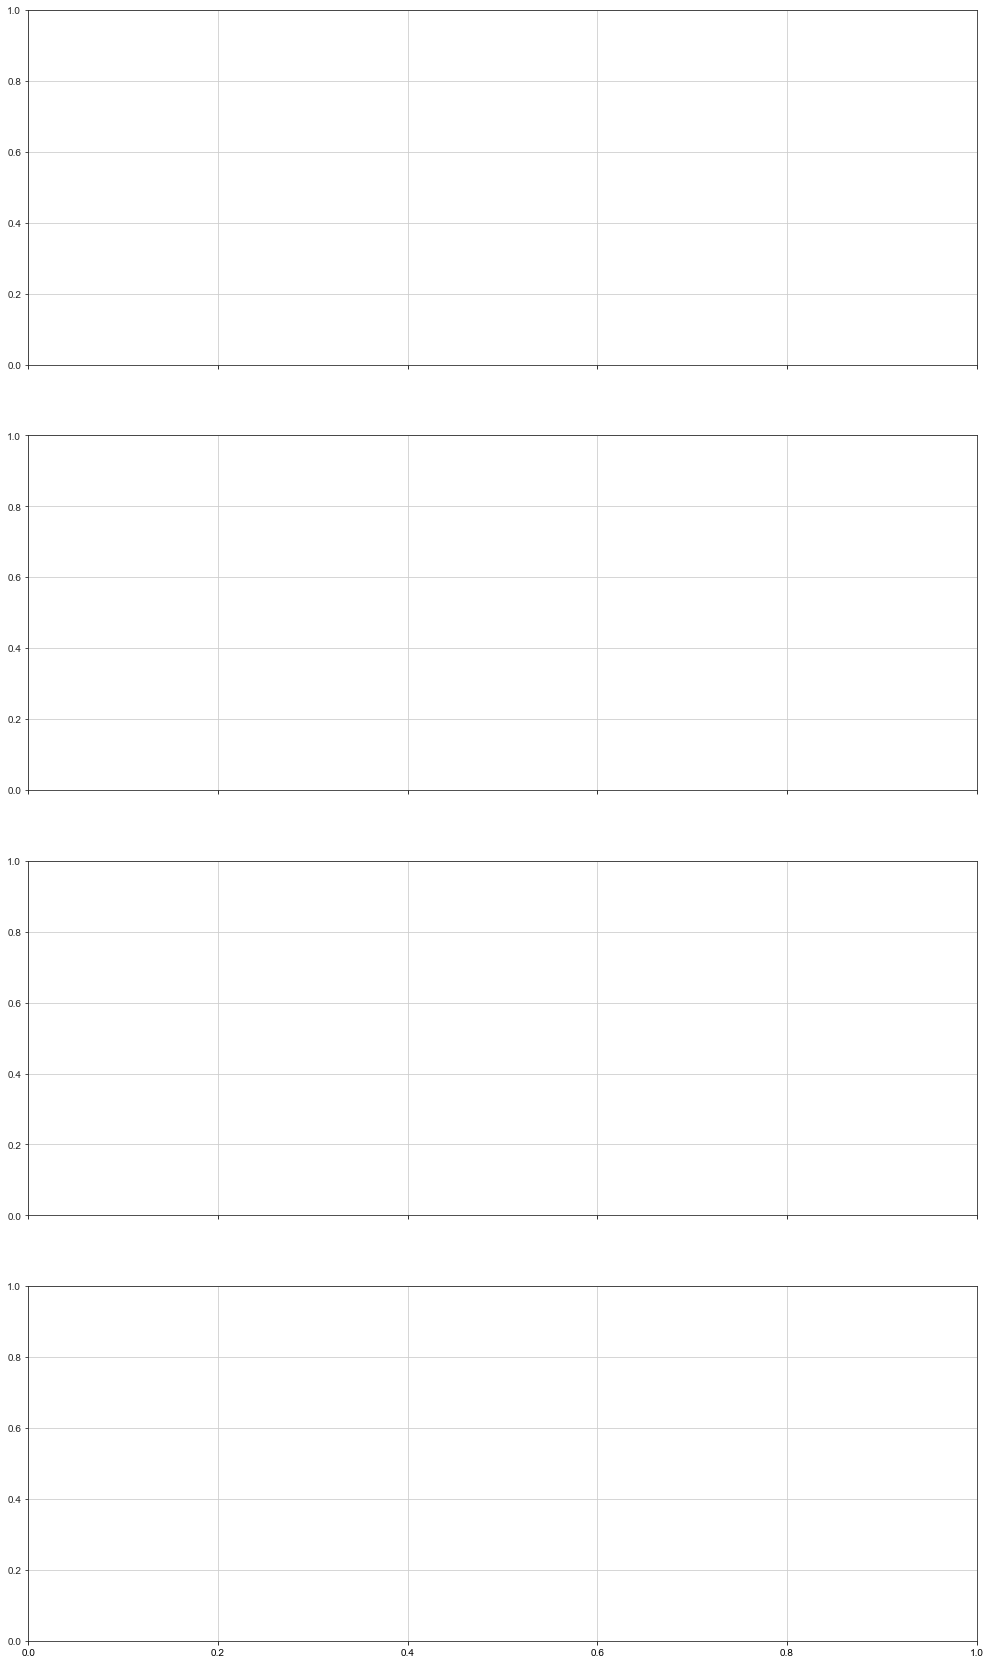

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Main DataFrame Name: "grouped_frame"

grouped_frame = pd.read_csv('grouped_data.csv')

grouped_frame.set_index(['Country Name', 'Indicator Name'], inplace = True)
grouped_frame.sort_values(by = ['Country Name'], inplace = True)

def plot_data(df):
    countries = df.index.get_level_values(0).unique().tolist()
    
    for country in countries:
        print(df.loc[country].head(1))
        break
        
    sns.set_style("ticks",{"xtick.color": 'black','axes.grid': True})
    
    fig, axs = plt.subplots(4,figsize = (17,30), gridspec_kw={'height_ratios':[1,1,1,1]}, sharex = True)
    
    sns.lineplot(data = subset)
    
    
plot_data(grouped_frame)

